In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

# Utility Function

In [ ]:
def convertRGB2HSI(img):

    # Convert RGB to HSI
    width, height, channel = img.shape

    # Create a new image
    new_img = np.zeros((width, height, channel), dtype=np.float64)

    for i in range(width):
        for j in range(height):
            # Get RGB value
            red, green, blue = img[i, j, 2], img[i, j, 1], img[i, j, 0]
            red, green, blue = red / 255.0, green / 255.0, blue / 255.0

            # Convert RGB to HSI
            intensity = max([red, green, blue])
            delta = intensity - min([red, green, blue])

            if intensity == 0:
                saturation = 0
                hue = 0
            elif delta == 0:
                saturation = 0
                hue = 0
            else:
                saturation = delta / intensity

                hue = 0
                if red == intensity:
                    hue = (green - blue) / (delta * 6)
                elif green == intensity:
                    hue = (2.0 + ((blue - red) / delta)) / 6.0
                elif blue == intensity:
                    hue = (4.0 + ((red - green) / delta)) / 6.0

            hue = (hue + 1) % 1
            new_img[i, j] = [hue, saturation, intensity]

    return new_img

In [ ]:
def convertHSI2RGB(img):

    # Convert HSI to RGB
    width, height, channel = img.shape

    # Create a new image
    new_img = np.zeros((width, height, channel), dtype=np.uint8)

    for i in range(width):
        for j in range(height):
            # Get HSI value
            hue, saturation, intensity = img[i, j]

            r, g, b = 0.0, 0.0, 0.0

            H_prime = math.floor(hue * 6)
            F = (hue * 6) - H_prime
            P = intensity * (1 - saturation)
            Q = intensity * (1 - (F * saturation))
            T = intensity * (1 - ((1 - F) * saturation))

            if H_prime == 0:
                r = intensity
                g = T
                b = P
            elif H_prime == 1:
                r = Q
                g = intensity
                b = P
            elif H_prime == 2:
                r = P
                g = intensity
                b = T
            elif H_prime == 3:
                r = P
                g = Q
                b = intensity
            elif H_prime == 4:
                r = T
                g = P
                b = intensity
            elif H_prime == 5:
                r = intensity
                g = P
                b = Q

            new_img[i, j] = [r * 255, g * 255, b * 255]

    return new_img

# Processing

In [51]:
orange_path = "img/oranges.jpg"
orange = cv.imread(orange_path, cv.IMREAD_COLOR)
orange_hsi = convertRGB2HSI(orange)

## Plot RGB Channels

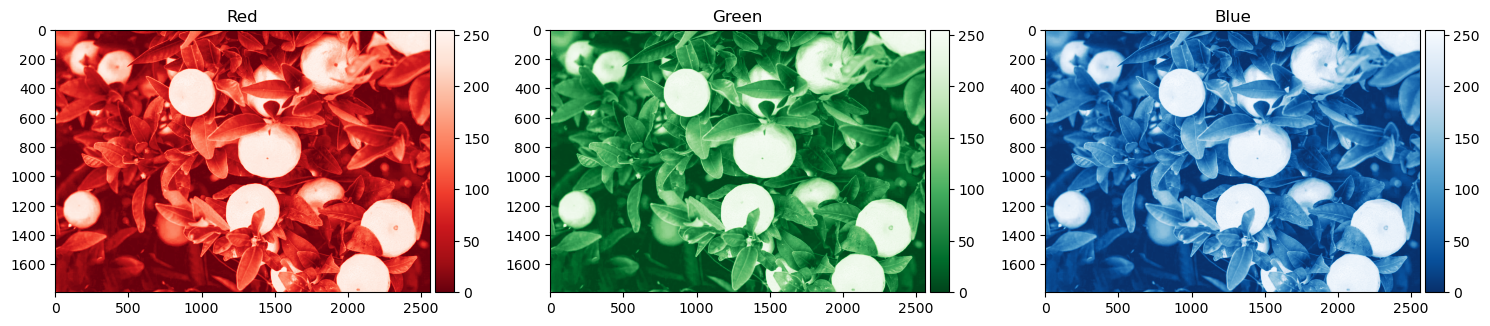

In [52]:
b, g, r = cv.split(orange)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(r, cmap="Reds_r")
axs[0].set_title("Red")
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(axs[0].imshow(r, cmap="Reds_r"), cax=cax)

axs[1].imshow(g, cmap="Greens_r")
axs[1].set_title("Green")
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(axs[1].imshow(r, cmap="Greens_r"), cax=cax)

axs[2].imshow(b, cmap="Blues_r")
axs[2].set_title("Blue")
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(axs[2].imshow(r, cmap="Blues_r"), cax=cax)

fig.tight_layout()

plt.savefig("output/5_2/rgb.png")
plt.show()

## Plot HSI Channels

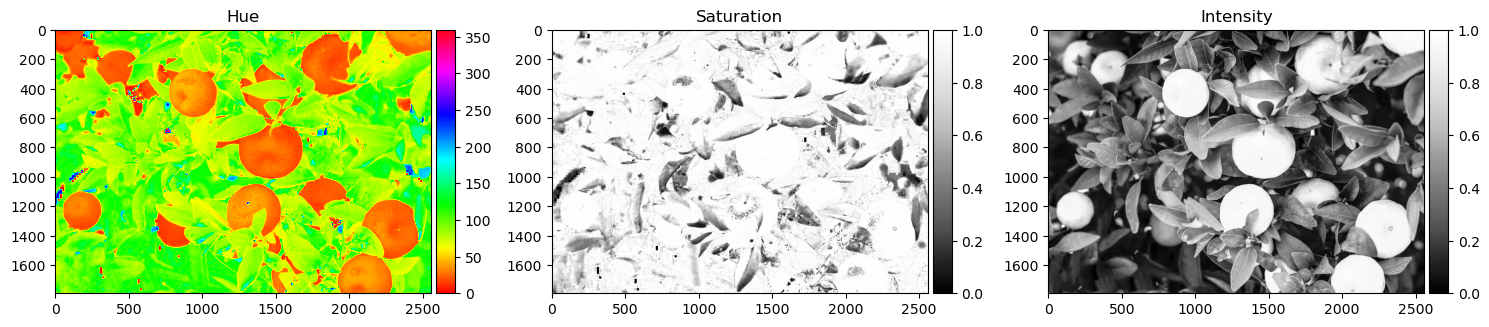

In [53]:
h, s, i = cv.split(orange_hsi)
h = h * 360

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(h, cmap="hsv")
axs[0].set_title("Hue")
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(axs[0].imshow(h, cmap="hsv"), cax=cax)

axs[1].imshow(s, cmap="Greys_r")
axs[1].set_title("Saturation")
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(axs[1].imshow(s, cmap="Greys_r"), cax=cax)

axs[2].imshow(i, cmap="Greys_r")
axs[2].set_title("Intensity")
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(axs[2].imshow(i, cmap="Greys_r"), cax=cax)

fig.tight_layout()

plt.savefig("output/5_2/hue_saturation_intensity.png")
plt.show()

## Slicing With Hue Channel Threshold

In [ ]:
# Filter out not orange
def filterOrange(img, hue=[0, 50]):

    min_hue, max_hue = hue

    hue_range = [min_hue / 360, max_hue/360]
    saturation_range = [0, 1]
    intensity_range = [0, 1]

    width, height, channel = img.shape

    # Create a new image
    new_img = np.zeros((width, height, channel), dtype=np.float64)

    for i in range(width):
        for j in range(height):
            # Get RGB value
            hue, saturation, intensity = img[i, j, 0], img[i, j, 1], img[i, j, 2]

            # Filter out not orange
            if hue_range[0] <= hue <= hue_range[1] and saturation_range[0] <= saturation <= saturation_range[1] and intensity_range[0] <= intensity <= intensity_range[1]:
                new_img[i, j] = [hue, saturation, intensity]
            else:
                new_img[i, j] = [240/360, 1, 0.5]

    return new_img

In [ ]:
filtered_orange = filterOrange(orange_hsi, hue=[5, 50])
filtered_orange_rgb = convertHSI2RGB(filtered_orange)

cv.imwrite("output/5_2/orange_sliced_hsi.png", cv.cvtColor(filtered_orange_rgb, cv.COLOR_RGB2BGR))

In [ ]:
width, height, channel = filtered_orange_rgb.shape

avg_r, avg_g, avg_b = 0, 0, 0
count_pixel = 0

min_r, min_g, min_b = 255, 255, 255
max_r, max_g, max_b = 0, 0, 0

for i in range(width):
    for j in range(height):
        r, g, b = filtered_orange_rgb[i, j]

        if r == 0 and g == 0 and b == 128:
            continue

        count_pixel += 1

        if r < min_r:
            min_r = r
        if g < min_g:
            min_g = g
        if b < min_b:
            min_b = b

        if r > max_r:
            max_r = r
        if g > max_g:
            max_g = g
        if b > max_b:
            max_b = b

        avg_r += r
        avg_g += g
        avg_b += b

avg_r /= count_pixel
avg_g /= count_pixel
avg_b /= count_pixel

print("Average RGB value of orange:", avg_r, avg_g, avg_b)

In [ ]:
print("Min RGB value of orange:", min_r, min_g, min_b)
print("Max RGB value of orange:", max_r, max_g, max_b)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv.cvtColor(orange, cv.COLOR_BGR2RGB))
axs[0].set_title("Original")

axs[1].imshow(filtered_orange_rgb)
axs[1].set_title("Orange Sliced")

fig.savefig("output/5_2/orange_sliced_hsi_plt.png")

fig.tight_layout()

In [ ]:
def colorSlicing(img, color, colorRange):

    r_range, g_range, b_range = colorRange
    r_color, g_color, b_color = color

    width, height, channel = img.shape

    # Create a new image
    new_img = np.zeros((width, height, channel), dtype=np.uint8)

    for i in range(width):
        for j in range(height):
            r, g, b = img[i, j]

            diff_r = abs(r - r_color)
            diff_g = abs(g - g_color)
            diff_b = abs(b - b_color)

            if diff_r <= r_range and diff_g <= g_range and diff_b <= b_range:
                new_img[i, j] = [r, g, b]
            else:
                new_img[i, j] = [0, 0, 128]

    return new_img

In [ ]:
orangeColor = (225, 100, 0)
orangeRange = (30, 100, 255)

orange_sliced = colorSlicing(cv.cvtColor(orange, cv.COLOR_BGR2RGB), orangeColor, orangeRange)

cv.imwrite("output/5_2/orange_sliced_rgb.png", cv.cvtColor(orange_sliced, cv.COLOR_RGB2BGR))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv.cvtColor(orange, cv.COLOR_BGR2RGB))
axs[0].set_title("Original")

axs[1].imshow(orange_sliced)
axs[1].set_title("Orange Sliced")

fig.tight_layout()

plt.savefig("output/5_2/orange_sliced_rgb_plt.png")
plt.show()